In [1]:
import pandas as pd
from pandas import Series, DataFrame
import os
import json
from subprocess import check_output
import string
import random
import time
import numpy as np

from git import Repo
dirname = "repo"
repo = Repo(dirname)
repo.git.checkout("master")

''

In [2]:
%matplotlib inline

In [3]:
# q1

commits_list = list(repo.iter_commits('master'))
len(commits_list)

8

In [4]:
# q2

author_commits = {}

for i in range(len(commits_list)):
    name = commits_list[i].author.name
    if name in author_commits:
        author_commits[name] += 1
    else:
        author_commits[name] = 1
    
author_commits

{'Steve': 3, 'Ada': 3, 'Linus': 2}

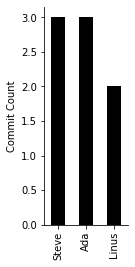

In [5]:
# q3

s = Series(author_commits)
s

import matplotlib.pyplot as plt

def get_ax(figsize=(4,4)):
    fig, ax = plt.subplots(figsize=figsize)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    return ax

ax = get_ax((1.5, 4))
ax.set_ylabel("Commit Count")
s.plot.bar(ax=ax, color="0")

In [6]:
from datetime import datetime # yes, both the module and type are named datetime

In [7]:
# q4

empty_dict = {}
authors_set = set(empty_dict)

for i in range(len(commits_list)):
    unix = commits_list[i].authored_date
    dt = datetime.fromtimestamp(unix)
    day = dt.isoweekday()
    if day in (6, 7) and commits_list[i].author.name not in authors_set:
        authors_set.add(commits_list[i].author.name)
    else: 
        pass
    
authors_set

{'Steve'}

In [8]:
# q5
    


In [9]:
# q6

In [10]:
def run_wc(body, commit=None):
    """Run a specific version of wc.py on a given text and return it's output as JSON."""
    
    with open("test.txt", "w", encoding = "utf-8") as f:
        f.write(body)
    
    if commit != None:
        repo.git.checkout(commit)
    else:
        repo.git.checkout('master')      
    try:
        output = str(check_output("python3 repo/wc.py test.txt ALL", shell = True), encoding = "utf-8")
        json_file = json.loads(output)
        return json_file
    except:
        return None

In [11]:
# test inputs to exercise wc.py

# expected result: {'X': 1, 'Y': 1, 'Z': 1}
test1 = """X Y Z"""

# expected result: 
test2 = """A B
A C
"""

# expected result: {'A': 2, 'B': 1, 'C': 1}
test3 = """A B
a c"""

In [12]:
# q7 

run_wc(test1)

{'X': 1, 'Y': 1, 'Z': 1}

In [13]:
# q8

run_wc(test3)

{'A': 2, 'B': 1, 'C': 1}

In [14]:
def test_table(body, expected):
    """Run every version of wc.py on a given output, and check which version produce correct output."""

    commit_output = {}
    df = pd.DataFrame()
    
    for i in reversed(range(len(commits_list))):
        commit_output['commit'] = commits_list[i].hexsha
        commit_output['msg20'] = commits_list[i].message.replace('\n','')[:20]
        commit_output['author'] = commits_list[i].author.name
        commit_output['pass'] = str(run_wc(body, commits_list[i]) == expected)
        df = df.append(commit_output, ignore_index=True)
        
    return df       

# Resource on how to append dicts to pandas dataframe
# https://stackoverflow.com/questions/43957347/append-dictionary-to-pandas-dataframe-in-a-loop

# How to loop backwards in python
# https://stackoverflow.com/questions/3476732/how-to-loop-backwards-in-python

In [15]:
# q9

test_table(test1, {'X': 1, 'Y': 1, 'Z': 1})

,author,commit,msg20,pass
0,Ada,6d7beafb8e79b7a92fed8e67673a33bb7f607dbe,count a specific wor,False
1,Linus,b0df6dbe111f9e28fc3a9c9b841cde5c20c365f9,support wildcards,True
2,Linus,761627a3ad9ee681f27211326e9149f01764ceee,bugfix,True
3,Ada,6f5ca9327e986315ffcacddce5d9d6195c0913b7,"ignore case, usage l",True
4,Steve,f37e610ce055a3d894baac2d9449e6eb77c72320,do not repeatedly re,True
5,Ada,c10b5a6cb4f06c96f6f221df2d5ec33af767d5c5,optimize: only compu,True
6,Steve,f637df3f45bc389e1035cc3aadcf5d81a55f0dc4,only make one pass o,False
7,Steve,4e4128313b8d5b5e5d04f2e8e585f64f7c5831a4,only make one pass o,True


In [16]:
# q10

test_table(test2, {'A': 2, 'B': 1, 'C': 1})

,author,commit,msg20,pass
0,Ada,6d7beafb8e79b7a92fed8e67673a33bb7f607dbe,count a specific wor,False
1,Linus,b0df6dbe111f9e28fc3a9c9b841cde5c20c365f9,support wildcards,False
2,Linus,761627a3ad9ee681f27211326e9149f01764ceee,bugfix,True
3,Ada,6f5ca9327e986315ffcacddce5d9d6195c0913b7,"ignore case, usage l",True
4,Steve,f37e610ce055a3d894baac2d9449e6eb77c72320,do not repeatedly re,True
5,Ada,c10b5a6cb4f06c96f6f221df2d5ec33af767d5c5,optimize: only compu,True
6,Steve,f637df3f45bc389e1035cc3aadcf5d81a55f0dc4,only make one pass o,False
7,Steve,4e4128313b8d5b5e5d04f2e8e585f64f7c5831a4,only make one pass o,True


In [17]:
# q11

test_table(test3, {'A': 2, 'B': 1, 'C': 1})

# Third input is the best because we want to make sure the least problems 
# occur and the third input produced the most, so we can test for worst 
# scenario.

,author,commit,msg20,pass
0,Ada,6d7beafb8e79b7a92fed8e67673a33bb7f607dbe,count a specific wor,False
1,Linus,b0df6dbe111f9e28fc3a9c9b841cde5c20c365f9,support wildcards,False
2,Linus,761627a3ad9ee681f27211326e9149f01764ceee,bugfix,False
3,Ada,6f5ca9327e986315ffcacddce5d9d6195c0913b7,"ignore case, usage l",True
4,Steve,f37e610ce055a3d894baac2d9449e6eb77c72320,do not repeatedly re,True
5,Ada,c10b5a6cb4f06c96f6f221df2d5ec33af767d5c5,optimize: only compu,True
6,Steve,f637df3f45bc389e1035cc3aadcf5d81a55f0dc4,only make one pass o,False
7,Steve,4e4128313b8d5b5e5d04f2e8e585f64f7c5831a4,only make one pass o,True


In [18]:
versions = {
    "v0-baseline": "6f5ca9327e986315ffcacddce5d9d6195c0913b7",
    "v1-open-once": "f37e610ce055a3d894baac2d9449e6eb77c72320",
    "v2-pass-per-uniq": "c10b5a6cb4f06c96f6f221df2d5ec33af767d5c5",
    "v3-single-pass": "4e4128313b8d5b5e5d04f2e8e585f64f7c5831a4",
}

In [19]:
def time_run_sec(uniq_words, total_words, word_size=6, commit=None):
    """Randomly generate input for wc.py and time how long it takes to run
"""
    word_list = []
    letters = string.ascii_lowercase
    word_input = ""
    word = ""
    
    for i in range(uniq_words):
        word = ""
        for j in range(word_size):
            word = word + random.choice(letters)
        word_list.append(word)
        
    for i in range(total_words):
        word_input = word_input + " " + random.choice(word_list)
        
    repo.git.checkout(commit)
    t0 = time.time()
    run_wc(word_input, commit)
    t1 = time.time()
    run_time = t1 - t0

    return run_time

Text(0.5, 0, 'Exec Time (ms)')

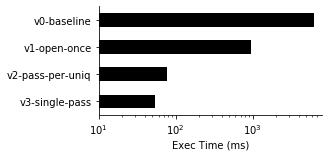

In [20]:
# q12

run_times_dict = {}

for v in sorted((versions), reverse=True):
    run_time = time_run_sec(100, 5000, 6, versions[v]) * 1000
    run_times_dict[v] = run_time
    
run_times_series = pd.Series(run_times_dict)
    
ax = run_times_series.plot.barh(figsize = (4,2), logx = True, color = "black")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.set_xticks([10, 10**2, 10**3])
ax.set_xlabel("Exec Time (ms)")

Text(0.5, 0, 'Exec Time (ms)')

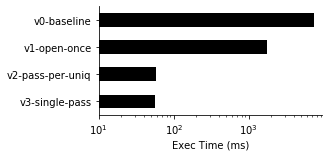

In [21]:
# q13

run_times_dict = {}

for v in sorted((versions), reverse=True):
    run_time = time_run_sec(1, 5000, 6, versions[v]) * 1000
    run_times_dict[v] = run_time
    
run_times_series = pd.Series(run_times_dict)
run_times_series.sort_values(inplace=True)
    
ax = run_times_series.plot.barh(figsize = (4,2), logx = True, color = "black")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.set_xticks([10, 10**2, 10**3])
ax.set_xlabel("Exec Time (ms)")

In [22]:
def test_performance(uniq_per, total_words, commit, word_size=6):
    """Test performance of wc.py"""
    run_times = {}
    
    for i in range(len(uniq_per)):
        if uniq_per[i] not in run_times:
            run_times[uniq_per[i]] = {}
        for j in range(len(total_words)):
            uniq_words = uniq_per[i] * total_words[j] // 100
            run_time = time_run_sec(uniq_words, total_words[j], word_size=6, commit=commit)
            run_times[uniq_per[i]][total_words[j]] = run_time
    
    df = pd.DataFrame(run_times)
    
    return df

In [23]:
total_words = [1000, 2000, 5000, 10000]
uniq_per = [10, 5, 1]

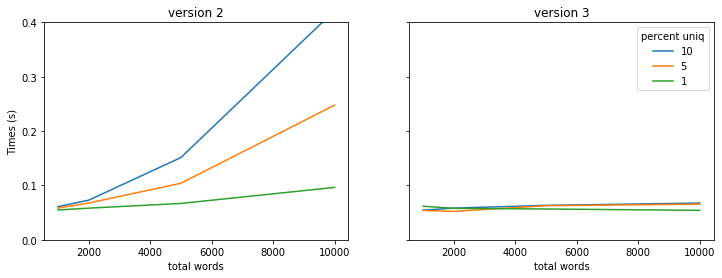

In [24]:
# q14

df_v2 = test_performance(uniq_per, total_words, versions['v2-pass-per-uniq'], 6)
df_v3 = test_performance(uniq_per, total_words, versions['v3-single-pass'], 6)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4), sharey = True)

axes[0].set_ylim([0, 0.4])
axes[0].set_yticks([0, 0.1, 0.2, 0.3, 0.4])
axes[0].set_xlabel("total words")
axes[0].set_ylabel("Times (s)")
axes[0].set_title("version 2")
axes[0].plot(df_v2)

axes[1].plot(df_v3)
axes[1].legend(uniq_per, title="percent uniq")
axes[1].set_title("version 3")
axes[1].set_xlabel("total words")

None

# Side By Side Plots
# https://stackoverflow.com/questions/42818361/how-to-make-two-plots-side-by-side-using-python

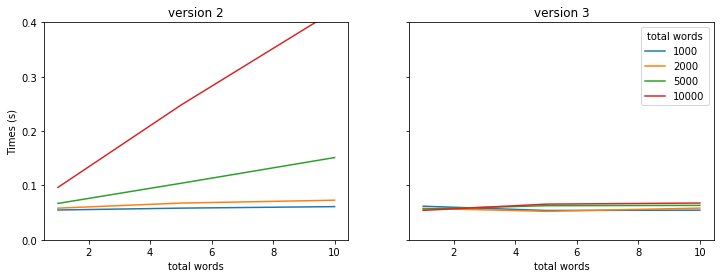

In [25]:
# q15

df_v2 = df_v2.transpose()
df_v3 = df_v3.transpose()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4), sharey = True)

axes[0].set_ylim([0, 0.4])
axes[0].set_yticks([0, 0.1, 0.2, 0.3, 0.4])
axes[0].set_xlabel("total words")
axes[0].set_ylabel("Times (s)")
axes[0].set_title("version 2")
axes[0].plot(df_v2)

axes[1].plot(df_v3)
axes[1].legend(total_words, title="total words")
axes[1].set_title("version 3")
axes[1].set_xlabel("total words")

None

In [26]:
class Counter(object):
    def __setitem__(self, key, value):
        if type(key) == type(''):
            key = key.upper()
        
        self.__dict__[key] = value
        
    def __getitem__(self, key):
        
        if type(key) == type(''):
            key = key.upper()
        
        key = key.upper() if type(key) == type('') else key
        if key in self.__dict__:
            return self.__dict__[key]
        else:
            return 0
        
    def __repr__(self): # show the return value in the interactive prompt
        return str(self.__dict__)
    
    def max_keys(self):
        max_list = []
        max_list = list(filter(lambda x: self.__dict__[x] == max(self.__dict__.values()), self.__dict__.keys()))
        
        return max_list
    
# What is filter()
# https://www.geeksforgeeks.org/filter-in-python/

In [27]:
# q17

c = Counter()
c["apple"]

0

In [28]:
#q18

c = Counter()
c["apple"] += 1
c["banana"] += 1
c["BANANA"] += 1
c["kiwi"] += 2
c["banana"]

2

In [29]:
# q19

c

{'APPLE': 1, 'BANANA': 2, 'KIWI': 2}

In [30]:
# q20 

c.max_keys()

['BANANA', 'KIWI']